# **Homework 2 RAG, Memory, Agents and Market Research**

Jack Xuhui Zhang, XZ588

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#Check directory to see if files needed are in the directory
!ls '//content/drive/My Drive/Colab Notebooks'

generative-ai-and-the-future-of-work-in-america-vf1.pdf  key.py		      vector_store_openai
HW1_Jack_Xuhui_Zhang_XZ588.ipynb			 __pycache__
HW2_Jack_Xuhui_Zhang_XZ588.ipynb			 vector_store_cohere


Install Packs

In [3]:
%%capture
!pip install  langchain     #Langchain
!pip install  "openai<=0.28.1"  #OpenAI pre-11/07

!pip install pypdf          #loader for pdfs
!pip install unstructured   #loader for unstructured text data
!pip install pypandoc       #universal document converter
!pip install chromadb       #Vector database

!pip install tiktoken       #tokenizer for Open AI models
!pip install streamlit      #GUI for apps

OpenAI API Key


In [4]:
import os

# Import the `key.py` file and get OpenAI's API key.
os.chdir('/content/drive/My Drive/Colab Notebooks')
import key

import openai
apikey_openai = key.OPENAI_API_KEY
os.environ["OPENAI_API_KEY"] = apikey_openai

import langchain

#Q1: Retrieval Augmented Generation (RAG): Querying External Files

For this homework assignment I would like you to compare the results of your analysis from using OpenAI and Cohere embeddings.  

To use Cohere Embeddings
1.	Go to Cohere.com and get an API key.
2.	In your key file, add COHERE_API_KEY="API KEY STRING"

In your python code, add/substitute the following lines as appropriate.
3.	Add: !pip install cohere
4.	Add: os.environ["COHERE_API_KEY"]=key.COHERE_API_KEY
5.	Substitute the line:
embeddings = CohereEmbeddings(model="embed-english-light-v3.0") instead ofembeddings = OpenAIEmbeddings()


In [5]:
%%capture
!pip install cohere

Cohere API Key

In [6]:
# Import the `key.py` file and get Cohere's API key.

import cohere
apikey_cohere = key.COHERE_API_KEY
os.environ["COHERE_API_KEY"]=key.COHERE_API_KEY

First, skim through the McKinsey Report, “Generative AI-Future of work in America.pdf” to get a general understanding of the material there. Then with this as your external document for RAG, please answer the following two questions using GPT-3.5-turbo.

A.	What share of the U.S. jobs will be affected by automation?

B.	How will generative AI impact the importance of credentials relative to experience in hiring?

1.	Comparing OpenAI embeddings with Different Chunking Sizes

Compare the results when using (a) chunk_size=2000, chunk_overlap=500 and (b) chunk_size=100, chunk_overlap=25.

Given the actual content in the document for the two chunking sizes, in your opinion, which chunking provided better answers for each of the two questions above. Explain briefly with a couple of bullet points. If they are roughly equal, say so.

In [7]:
## Import Libraries
import openai
import langchain
import textwrap

##(1) Document Loaders
#Libraries
from langchain.document_loaders import PyPDFLoader

# Loading documents (McK Report)
loader = PyPDFLoader("generative-ai-and-the-future-of-work-in-america-vf1.pdf")
documents = loader.load()
print(documents)          # print to ensure document loaded correctly--comment out after checking
print('\n')

[Document(page_content='July 2023\nAuthors\nKweilin Ellingrud\nSaurabh Sanghvi\nGurneet Singh Dandona\nAnu Madgavkar\nMichael Chui\nOlivia White\nPaige Hasebe\nEditor \nLisa RenaudMcKinsey Center for Government \nGenerative \nAI and the \nfuture of work \nin America', metadata={'source': 'generative-ai-and-the-future-of-work-in-america-vf1.pdf', 'page': 0}), Document(page_content='Cover illustration by Matt Murphy', metadata={'source': 'generative-ai-and-the-future-of-work-in-america-vf1.pdf', 'page': 1}), Document(page_content='About the McKinsey Global Institute\nThe McKinsey Global Institute was established in 1990. Our mission is to provide a fact base to \naid decision making on the economic and business issues most critical to the world’s companies \nand policy leaders. We benefit from the full range of McKinsey’s regional, sectoral, and functional \nknowledge, skills, and expertise, but editorial direction and decisions are solely the responsibility \nof MGI directors and partne

In [8]:
first_page_content = documents[2].page_content
print(first_page_content)

About the McKinsey Global Institute
The McKinsey Global Institute was established in 1990. Our mission is to provide a fact base to 
aid decision making on the economic and business issues most critical to the world’s companies 
and policy leaders. We benefit from the full range of McKinsey’s regional, sectoral, and functional 
knowledge, skills, and expertise, but editorial direction and decisions are solely the responsibility 
of MGI directors and partners.
Our research is grouped into five major themes:
— Productivity and prosperity: Creating and harnessing the world’s assets most productively
— Resources of the world: Building, powering, and feeding the world sustainably
— Human potential: Maximizing and achieving the potential of human talent
— Global connections: Exploring how flows of goods, people, and ideas shape economies
— Technologies and markets of the future: Discussing the next big arenas of value 
and competition
We aim for independent and fact-based research. None of o

I notice displacement of some the text compared to orginal doc, which is due to the: inherent structure of the PDF and the PDF uploader.

In [9]:
##(2) Document Splitting, embeddings and indexing
#Libraries import
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.embeddings.cohere import CohereEmbeddings
from langchain.vectorstores import Chroma

#Splitting Documents into Chunks
#text_splitter: (a) chunk_size=2000, chunk_overlap=500; (b) chunk_size=100, chunk_overlap=25;
text_splitter_a = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=500)
text_splitter_b = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=25)

chunks_a = text_splitter_a.split_documents(documents)
chunks_b = text_splitter_b.split_documents(documents)
# to see the chunks
print(chunks_a[0])
print(chunks_a[1])
print("\n")
print("----------------------------------------------")
print(chunks_b[0])
print(chunks_b[1])
print(chunks_b[2])
print(chunks_b[3])
print(chunks_b[4])

page_content='July 2023\nAuthors\nKweilin Ellingrud\nSaurabh Sanghvi\nGurneet Singh Dandona\nAnu Madgavkar\nMichael Chui\nOlivia White\nPaige Hasebe\nEditor \nLisa RenaudMcKinsey Center for Government \nGenerative \nAI and the \nfuture of work \nin America' metadata={'source': 'generative-ai-and-the-future-of-work-in-america-vf1.pdf', 'page': 0}
page_content='Cover illustration by Matt Murphy' metadata={'source': 'generative-ai-and-the-future-of-work-in-america-vf1.pdf', 'page': 1}


----------------------------------------------
page_content='July 2023\nAuthors\nKweilin Ellingrud\nSaurabh Sanghvi\nGurneet Singh Dandona\nAnu Madgavkar\nMichael Chui' metadata={'source': 'generative-ai-and-the-future-of-work-in-america-vf1.pdf', 'page': 0}
page_content='Michael Chui\nOlivia White\nPaige Hasebe\nEditor \nLisa RenaudMcKinsey Center for Government' metadata={'source': 'generative-ai-and-the-future-of-work-in-america-vf1.pdf', 'page': 0}
page_content='Generative \nAI and the \nfuture of work

It's unclear to me how the text was tokenized and what the chunk_size actually mean. Is it by character?

In [10]:
##Embedding & Indexing
#Store the chunks as embeddings within a vector store from which to retreive information for queries
embeddings_openai = OpenAIEmbeddings()
embeddings_cohere = CohereEmbeddings()
vector_store_openai_a = Chroma.from_documents(documents=chunks_a, embedding=embeddings_openai,persist_directory='/content/drive/My Drive/Colab Notebooks/vector_store_openai')
vector_store_openai_b = Chroma.from_documents(documents=chunks_b, embedding=embeddings_openai,persist_directory='/content/drive/My Drive/Colab Notebooks/vector_store_openai')
vector_store_cohere_a = Chroma.from_documents(documents=chunks_a, embedding=embeddings_cohere,persist_directory='/content/drive/My Drive/Colab Notebooks/vector_store_cohere')
vector_store_cohere_b = Chroma.from_documents(documents=chunks_b, embedding=embeddings_cohere,persist_directory='/content/drive/My Drive/Colab Notebooks/vector_store_cohere')

In [11]:
## Retrieval
#LC Model: Using ChatOpenAI and initialize OpenAI instance
from langchain.chat_models import ChatOpenAI            #used for GPT3.5/4 model
os.environ["OPENAI_API_KEY"] = apikey_openai
llm = ChatOpenAI(model='gpt-3.5-turbo', temperature=0)

# initialize OpenAI instance and set up a chain for Q&A from an LLM and a vector score
retriever_openai_a=vector_store_openai_a.as_retriever()
retriever_openai_b=vector_store_openai_b.as_retriever()
retriever_cohere_a=vector_store_cohere_a.as_retriever()
retriever_openai_b=vector_store_cohere_b.as_retriever()


#Memory Setup and Conversational Retrieval Chain
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory(
    memory_key="chat_history",
    return_messages=True
)

from langchain.chains import ConversationalRetrievalChain
crchain_openai_a = ConversationalRetrievalChain.from_llm(
    llm,
    retriever=retriever_openai_a,
    memory=memory
)

from langchain.chains import ConversationalRetrievalChain
crchain_openai_b = ConversationalRetrievalChain.from_llm(
    llm,
    retriever=retriever_openai_a,
    memory=memory
)

from langchain.chains import ConversationalRetrievalChain
crchain_cohere_a = ConversationalRetrievalChain.from_llm(
    llm,
    retriever=retriever_openai_a,
    memory=memory
)

from langchain.chains import ConversationalRetrievalChain
crchain_cohere_b = ConversationalRetrievalChain.from_llm(
    llm,
    retriever=retriever_openai_a,
    memory=memory
)

Run the questions using different embeddings:

A. What share of the U.S. jobs will be affected by automation?

B. How will generative AI impact the importance of credentials relative to experience in hiring?

In [12]:
# Run chain with question
question_1 = "What share of the U.S. jobs will be affected by automation? If you don't know the answer, just say that you don't know, don't try to make up an answer."
question_2 = "How will generative AI impact the importance of credentials relative to experience in hiring? If you don't know the answer, just say that you don't know, don't try to make up an answer."

response_openai_a_1 = crchain_openai_a.run(question_1)
print(textwrap.fill("Openai Embedding & chunk_size=2000, chunk_overlap=500:",75))
print('\n')
print(textwrap.fill(question_1,75))
print("- "+textwrap.fill(response_openai_a_1,75))
print('\n')

response_openai_a_2 = crchain_openai_a.run(question_2)
print(textwrap.fill(question_2,75))
print("- "+textwrap.fill(response_openai_a_2,75))
print('\n')
print('-'*75)


Openai Embedding & chunk_size=2000, chunk_overlap=500:


What share of the U.S. jobs will be affected by automation? If you don't
know the answer, just say that you don't know, don't try to make up an
answer.
- I don't know the specific share of U.S. jobs that will be affected by
automation.


How will generative AI impact the importance of credentials relative to
experience in hiring? If you don't know the answer, just say that you don't
know, don't try to make up an answer.
- Generative AI has the potential to impact the importance of credentials
relative to experience in hiring for white-collar jobs. As generative AI
becomes more advanced, it may be able to perform tasks traditionally done
by humans, such as data analysis, content creation, and even decision-
making. This could lead to a shift in the hiring process, where employers
may prioritize candidates with experience in working with generative AI
systems rather than solely relying on their credentials. However, it is
important

In [13]:
response_openai_b_1 = crchain_openai_b.run(question_1)
print(textwrap.fill("Openai Embedding & chunk_size=100, chunk_overlap=25:",75))
print('\n')
print(textwrap.fill(question_1,75))
print("- "+textwrap.fill(response_openai_b_1,75))
print('\n')

response_openai_b_2 = crchain_openai_b.run(question_2)
print(textwrap.fill(question_2,75))
print("- "+textwrap.fill(response_openai_b_2,75))
print('\n')
print('-'*75)

Openai Embedding & chunk_size=100, chunk_overlap=25:


What share of the U.S. jobs will be affected by automation? If you don't
know the answer, just say that you don't know, don't try to make up an
answer.
- Generative AI has the potential to impact the importance of credentials
relative to experience in hiring for white-collar jobs. As generative AI
becomes more advanced, it may be able to perform tasks traditionally done
by humans, such as data analysis, content creation, and even decision-
making. This could lead to a shift in the hiring process, where employers
may prioritize candidates with experience in working with generative AI
systems rather than solely relying on their credentials. However, it is
important to note that the exact impact will depend on various factors,
including the specific industry, job role, and the level of trust and
acceptance of generative AI in the hiring process.


How will generative AI impact the importance of credentials relative to
experience in hi

In [14]:
response_cohere_a_1 = crchain_cohere_a.run(question_1)
print(textwrap.fill("Cohere Embedding & chunk_size=2000, chunk_overlap=500:",75))
print('\n')
print(textwrap.fill(question_1,75))
print("- "+textwrap.fill(response_cohere_a_1,75))
print('\n')

response_cohere_a_2 = crchain_cohere_a.run(question_2)
print(textwrap.fill(question_2,75))
print("- "+textwrap.fill(response_cohere_a_2,75))
print('\n')
print('-'*75)

Cohere Embedding & chunk_size=2000, chunk_overlap=500:


What share of the U.S. jobs will be affected by automation? If you don't
know the answer, just say that you don't know, don't try to make up an
answer.
- The provided context does not directly mention the potential impact of
generative AI on the percentage of U.S. jobs that will be affected by
automation. It states that the research does not estimate job losses, but
rather focuses on changes in the employment mix. It also mentions that the
occupational categories most exposed to generative AI could continue to add
jobs through 2030, although its adoption may slow their rate of growth. For
a deeper discussion of the employment effects of generative AI, it suggests
referring to chapter 3 and McKinsey and MGI reports mentioned in context
37.


How will generative AI impact the importance of credentials relative to
experience in hiring? If you don't know the answer, just say that you don't
know, don't try to make up an answer.
- Gene

In [15]:
response_cohere_b_1 = crchain_cohere_b.run(question_1)
print(textwrap.fill("Cohere Embedding & chunk_size=100, chunk_overlap=25:",75))
print('\n')
print(textwrap.fill(question_1,75))
print("- "+textwrap.fill(response_cohere_b_1,75))
print('\n')

response_cohere_b_2 = crchain_cohere_b.run(question_2)
print(textwrap.fill(question_2,75))
print("- "+textwrap.fill(response_cohere_b_2,75))
print('\n')
print('-'*75)

Cohere Embedding & chunk_size=100, chunk_overlap=25:


What share of the U.S. jobs will be affected by automation? If you don't
know the answer, just say that you don't know, don't try to make up an
answer.
- I don't know the estimated percentage of U.S. jobs that will be impacted by
automation.


How will generative AI impact the importance of credentials relative to
experience in hiring? If you don't know the answer, just say that you don't
know, don't try to make up an answer.
- The given context does not provide any information about the factors that
will determine the exact impact of generative AI on the importance of
credentials relative to experience in hiring. Therefore, it is not possible
to answer the question based on the provided context.


---------------------------------------------------------------------------


- In general, the answers with larger chunk sizes appear more consistent and directly address the questions. Though the incorrect answer given with OpenAI embedding with smaller chunk size may be an issue with incorrectly affected by the memory (I tried to change to use RetrievalQA and the model change to produce answer saying the data is not mentioned in the given context).

- Between the two embeddings, the answers given with Cohere embeddings tends to provide more specific details, refelcting differences in capturing and prioritizing different aspects of the input. Also I note that Cohere embedding has considerablly higher dimentionality than OpenAI Embedding, which may give some explaination to the difference.

I also directly use ChatGPT 4 to analyze the PDF. It provides better answers in terms of consistency and completeness:

- Regarding the share of U.S. jobs affected by automation, the document states that without generative AI, automation could take over tasks accounting for 21.5 percent of the hours currently worked in the U.S. economy by 2030. With the introduction of generative AI, this share is estimated to increase to 29.5 percent. This reflects a significant increase in tasks involving expertise, interactions with people, and even creativity, while tasks requiring physical work are expected to be less affected

- The document suggests that as the labor market evolves, there may be a shift towards valuing skills and competencies over traditional educational credentials. It states that a significant portion of the workforce possesses skills gained through experience rather than formal education, with 60 percent of U.S. workers not having four-year college degrees. Efforts like the "Tear the Paper Ceiling" initiative are highlighted for supporting workers with experience over degrees, indicating a growing awareness and potential shift among employers towards more inclusive hiring practices. Furthermore, employers are encouraged to recruit from typically overlooked populations and to focus on skills and abilities in their hiring processes​​​​.This change aligns with the broader trend of employers seeking to hire for skills and competencies, possibly as a response to the changes brought about by technologies like generative AI. The document doesn't explicitly state how generative AI will change the relative importance of credentials and experience, but the context suggests that the advancement of AI could contribute to a hiring landscape that favors demonstrable skills and practical experience, potentially at the expense of traditional credentials.

# Question 2: Agents, Tools and Memory

Consider the following series of four questions by a customer with an AI system.

· Who reached the peak of Mount Everest first?

· When was that?

· What is the typical pace of a climber trying to scale the peak in feet per hour? · If one could hold that steady space, how long would it take to scale the peak?

Now answer the following questions.

1. Suppose you were to design an agent using LangChain to conduct this conversation.

a. Which type of Agent in LangChain would you need? Explain briefly.

b. What tools would you need? Explain briefly in 1-2 sentences for each tool.

c. What type of memory would you use by default?!

ANSWER:

 a.b
 - Will need Search Agent, such as: 'wolfram-alpha',"wikipedia" for question 1 & 2 and "the height of Mount Everest" & "typical pace of a climber in feet per hour" for question 3
 - May also need Search Agent, such as: 'google search' for "typical pace of a climber in feet per hour".
 - Then use Calculator Agent "llm-math" to calcuate the hours needed.

c. Will use Conversation Buffer Memory as default.


2. Write the code for this agent. Show the python code and the output of the conversation with each question.


In [16]:
#Install the Packs
%%capture
!pip install wikipedia
!pip install google-search-results    #Google Search for SerpAPI
!pip install wolframalpha     #Wolfram Alpha for fancy science computations,algebraic solutions, and scientific facts

In [17]:
#Set up the API keys
import importlib
importlib.reload(key)
print(dir(key))

['COHERE_API_KEY', 'OPENAI_API_KEY', 'SERPAPI_API_KEY', 'WOLFRAM_ALPHA_APPID', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


In [18]:
os.environ["SERPAPI_API_KEY"] = key.SERPAPI_API_KEY
os.environ["WOLFRAM_ALPHA_APPID"] = key.WOLFRAM_ALPHA_APPID

In [19]:
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.agents import load_tools, initialize_agent, AgentType

llm= OpenAI(temperature=0.0)

tools = load_tools(['wolfram-alpha', 'wikipedia', 'serpapi', 'llm-math'],llm)
agent= initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)


In [20]:
questions = "Who reached the peak of Mount Everest first? When was that? What is the typical pace of a climber trying to scale the peak in feet per hour? If one could hold that steady space, how long would it take to scale the peak?"
agent.run(questions)



> Entering new AgentExecutor chain...
 I need to find out who reached the peak first, when that was, and how long it would take to scale the peak.
Action: Wikipedia
Action Input: "Mount Everest"
Observation: Page: Mount Everest
Summary: Mount Everest (Nepali: सगरमाथा, romanized: Sagarmāthā; Tibetan: Chomolungma ཇོ་མོ་གླང་མ; Chinese: 珠穆朗玛峰; pinyin: Zhūmùlǎngmǎ Fēng) is Earth's highest mountain above sea level, located in the Mahalangur Himal sub-range of the Himalayas. The China–Nepal border runs across its summit point. Its elevation (snow height) of 8,848.86 m (29,031 ft 8+1⁄2 in) was most recently established in 2020 by the Chinese and Nepali authorities.Mount Everest attracts many climbers, including highly experienced mountaineers. There are two main climbing routes, one approaching the summit from the southeast in Nepal (known as the "standard route") and the other from the north in Tibet. While not posing substantial technical climbing challenges on the standard route, Everest 

'The first people to reach the peak of Mount Everest were George Mallory and Andrew Irvine in 1924. The typical pace of a climber trying to scale the peak is around 1,000 feet per hour, and it would take around 28 hours to scale the peak at that pace.'

In [21]:
questions = "Who reached the peak of Mount Everest first? When was that? What is the typical pace of a climber trying to scale the peak in feet per hour? If one could hold that steady space, how long would it take to scale the peak? Firstly search on multiple sources, secondly compare the result, lastly give me the best result as answer. If there's any calculation required during the process, use the calculator."
agent.run(questions)



> Entering new AgentExecutor chain...
 I need to search multiple sources and compare the results to get the best answer.
Action: Search
Action Input: "Who reached the peak of Mount Everest first?"
Observation: ["Mount Everest is Earth's highest mountain above sea level, located in the Mahalangur Himal sub-range of the Himalayas. The China–Nepal border runs across its summit point. Its elevation of 8,848.86 m was most recently established in 2020 by the Chinese and Nepali authorities.", 'Mount Everest type: Mountain in Asia.', 'Mount Everest kgmid: /m/0blbd.', 'Mount Everest elevation: 29,032′.', 'Mount Everest first_ascent: May 29, 1953.', 'Mount Everest prominence: 29,029′.', 'Mount Everest location: Solukhumbu District, Koshi Province, Nepal; Tingri County, Xigazê, Tibet Autonomous Region, China.', 'Mount Everest continent: southern Asia.', 'Mount Everest mountain_range: Himalayas, Mahalangur Himal.', 'On 29 May 1953, Hillary and Sherpa mountaineer Tenzing Norgay became the first c

'Edmund Hillary and Tenzing Norgay were the first people to reach the summit of Mount Everest on May 29, 1953. The typical pace of a climber trying to scale the peak is around 1,000 feet per hour, and it would take around 29 hours to reach the summit if one could maintain that pace.'


3. How would these results compare if you had tried to do the step by search yourself? Would your answer differ? What are the reasons for any difference you identify?


If I do the steps by traditional search. Google search will handle the fact-based questions well, such as Question 1 & 2. See attached screenshot. (https://www.google.com/search?q=Who+reached+the+peak+of+Mount+Everest+first+and+when%3F&sca_esv=587480788&sxsrf=AM9HkKlEqCsGp-tdXJDkDVe66y6ZnEWoyQ%3A1701616460321&ei=TJtsZc2PE_6jptQPkLOO-Ac&ved=0ahUKEwjN5aSlx_OCAxX-kYkEHZCZA38Q4dUDCBA&uact=5&oq=Who+reached+the+peak+of+Mount+Everest+first+and+when%3F&gs_lp=Egxnd3Mtd2l6LXNlcnAiNVdobyByZWFjaGVkIHRoZSBwZWFrIG9mIE1vdW50IEV2ZXJlc3QgZmlyc3QgYW5kIHdoZW4_MgQQIxgnSKdIUOkFWOYgcAF4AZABAJgBYqABYqoBATG4AQPIAQD4AQHCAgcQIxiwAxgnwgIKEAAYRxjWBBiwA-IDBBgAIEGIBgGQBgk&sclient=gws-wiz-serp)

For the last question, Google search will yield information with more nuances and evidence/ framework for further evaluation of the outcome. For example, through Google search I found this post (https://www.andeansummitadventure.rocks/hiking-time-calculations/) explaining in details on hiking time calculation, taking into detailed considerations:

The model understands that mountaineers need about one hour to climb 300 m / 985 ft in vertical elevation gain and one hour to descent 500 m / 1,640 ft. Furthermore, they can hike 4 km / 2.5 miles per hour on flat terrain. Out of this basic information a formula can be derived:

- Calculation of horizontal and vertical distance
- Halve the smaller amount
- Sum up the two results
- Different acsending speed given different altitudes.



4. Show how the output would change if you used ConversationBufferWindowMemory(k=2) when designing the agent.


In [22]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory
from langchain.memory import ConversationBufferWindowMemory
from langchain.memory import ConversationTokenBufferMemory
from langchain.memory import ConversationSummaryBufferMemory

In [23]:
#Set up the language model and memory for a conversational chain
llm=ChatOpenAI()
memory = ConversationBufferWindowMemory(k=2)

#Load up a chat history
memory.load_memory_variables({})
llm= OpenAI(temperature=1)

# Initialize the conversation chain
conversation = ConversationChain(llm=llm, memory=memory)
print(conversation.predict(input="Who reached the peak of Mount Everest first?"))
print(conversation.predict(input="When was that?"))
print(conversation.predict(input="What is the typical pace of a climber trying to scale the peak in feet per hour?"))
print(conversation.predict(input="If one could hold that steady space, how long would it take to scale the peak?"))

 Sir Edmund Hillary and Tenzing Norgay were the first people to reach the peak of Mount Everest back in May 1953. They are the first people to be recorded to have reached the peak of the world's tallest mountain, and the first to reach it without supplemental oxygen.
 Sir Edmund Hillary and Tenzing Norgay first reached the peak of Mount Everest on May 29, 1953.
 The average pace of a climber trying to reach the peak of Mount Everest is between 1,000 and 2,500 feet per hour. Climbers attempting to reach the summit typically take between 10 to 12 hours to reach the peak, depending on the weather and other conditions.
 If a climber could maintain a steady pace of 1,500 feet per hour, they could reach the summit of Mount Everest in approximately 8.5 hours. However, this time could vary significantly due to unpredictable weather and other environmental factors.


5. Show how the output would change if you used

memory = ConversationSummaryBufferMemory(llm=llm,memory_key='chat_history',

max_token_limit=100, return_messages=True) when designing the agent.

In [24]:
#Set up the language model and memory for a conversational chain
llm=ChatOpenAI()
memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100, return_messages=True)

#Load up a chat history
memory.load_memory_variables({})
llm= OpenAI(temperature=1)

# Initialize the conversation chain
conversation = ConversationChain(llm=llm, memory=memory)
print(conversation.predict(input="Who reached the peak of Mount Everest first?"))
print(conversation.predict(input="When was that?"))
print(conversation.predict(input="What is the typical pace of a climber trying to scale the peak in feet per hour?"))
print(conversation.predict(input="If one could hold that steady space, how long would it take to scale the peak?"))

 Sir Edmund Hillary and Tenzing Norgay were the first to reach the peak of Mount Everest in 1953. They made their unprecedented ascent on May 29th with an expedition led by John Hunt.
 Sir Edmund Hillary and Tenzing Norgay reached the peak of Mount Everest in 1953 on May 29th.
 The typical pace of a climber scaling the peak of Mount Everest varies widely depending on a variety of factors, such as the climber's skill level, the type of terrain, and the weather conditions. Generally, climbers who are attempting to reach the summit of Mount Everest can climb about 500 vertical feet per hour on average.
 On average, it would take approximately 2-3 days to climb Mount Everest from base camp to summit, depending on the climber's energy and determination.


In [25]:
#Set up the language model and memory for a conversational chain
llm=ChatOpenAI()
memory = ConversationBufferMemory(llm=llm)

#Load up a chat history
memory.load_memory_variables({})
llm= OpenAI(temperature=1)

# Initialize the conversation chain
conversation = ConversationChain(llm=llm, memory=memory)
print(conversation.predict(input="Who reached the peak of Mount Everest first?"))
print(conversation.predict(input="When was that?"))
print(conversation.predict(input="What is the typical pace of a climber trying to scale the peak in feet per hour?"))
print(conversation.predict(input="If one could hold that steady space, how long would it take to scale the peak?"))

 The first people to successfully reach the summit of Mount Everest were a Nepalese climber named Tenzing Norgay and Sir Edmund Hillary from New Zealand, in 1953.
 Tenzing Norgay and Sir Edmund Hillary reached the peak of Mount Everest on May 29th, 1953.
 The climbing pace of a climber trying to scale the peak of Mount Everest varies depending on their skill and experience level. Generally, climbers progress 1,000-3,000 feet per day. This works out to an average of 5-15 feet per hour.
 It typically takes climbers roughly two months to ascend Mount Everest, although this length of time could vary depending on a variety of factors.


The Summary Buffer Memory provides an answer with (a) more context to prior conversations; (b) more specific details , comparing to the Buffer Window Memory (k=2) and Conversation Buffer Memory.

The results from Summary Buffer Memory feel closer to natural human conversation.

# **Question 3:**

## **1. Data Analysis:**

In [26]:
%%capture
!pip install langchain

In [27]:
%%capture
!pip install langchain-experimental

In [28]:
import csv                # Import the CSV module to work with CSV files
import pandas as pd       # Import the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Import Matplotlib's pyplot module for creating plots
import seaborn as sns     # Import Seaborn for creating statistical visualizations

# Import the data analysis agent
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

In [29]:

# Load the dataset from a URL
url = 'https://archive.ics.uci.edu/static/public/2/data.csv'

# Read the CSV data from the specified URL using pandas 'read_csv' function.

# In this dataset, the values are separated by semicolons, so we specify 'sep=";"'.

data = pd.read_csv(url, sep=",")

# Display the first few rows of the loaded dataset to inspect its contents.

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Using the panda data frame agent, answer the following.


a. How many rows and columns are there in the data.


b. List the variables in the data.


c. The income variables is a binary variable showing if income<=50K or income>50K. Draw a plot showing how the share of “income < 50K” varies by gender.

In [30]:
# Create an instance of the OpenAI language model.
llm = OpenAI(temperature=0.5)

# Create a pandas_dataframe agent
agent = create_pandas_dataframe_agent(
    llm,              #language model instance
    data,             #data frame used
    verbose=True,
)

In [31]:
agent("How many rows and columns are there in the data?")



> Entering new AgentExecutor chain...
Thought: I need to find out the size of the dataframe.
Action: python_repl_ast
Action Input: df.shape
Observation: (48842, 15)
Thought: I now know the final answer.
Final Answer: There are 48842 rows and 15 columns in the data.

> Finished chain.


{'input': 'How many rows and columns are there in the data?',
 'output': 'There are 48842 rows and 15 columns in the data.'}

In [32]:
data.shape

(48842, 15)

In [33]:
agent("List the variables in the data. List them in JSON format")



> Entering new AgentExecutor chain...
Thought: I need to extract the column names from the dataframe
Action: python_repl_ast
Action Input: df.columns.to_json()
Observation: AttributeError: 'Index' object has no attribute 'to_json'
Thought: I need to convert the column names to a list first
Action: python_repl_ast
Action Input: list(df.columns)
Observation: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
Thought: I can now convert the list to JSON
Action: python_repl_ast
Action Input: json.dumps(list(df.columns))
Observation: NameError: name 'json' is not defined
Thought: I need to import the json module first
Action: python_repl_ast
Action Input: import json
Observation: 
Thought: I can now convert the list to JSON
Action: python_repl_ast
Action Input: json.dumps(list(df.columns))
Observation: ["age", "workclass", "fnlwgt", "educati

{'input': 'List the variables in the data. List them in JSON format',
 'output': '["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]'}



> Entering new AgentExecutor chain...

Thought: I need to create a new binary variable and then plot the percentage distribution of that variable.
Action: python_repl_ast
Action Input: df['Income Threshold'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
Observation: 
Thought: I now need to plot the percentage distribution of this variable.
Action: python_repl_ast
Action Input: df.groupby(['sex', 'Income Threshold'])['Income Threshold'].count().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', stacked=True)
Observation: Axes(0.125,0.11;0.775x0.77)
Thought:

<string>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


 I now know the final answer
Final Answer: A bar plot showing the percentage distribution of the 'Income Threshold' variable by gender, with the columns of the same gender stacked.

> Finished chain.


{'input': "Create a binary variable called 'Income Threhold' separating income<=50K (0) and income>50K (1). Draw a plot showing the percentage distribution of 'Income Threhold' variable by gender.Stack the column of the same gender.",
 'output': "A bar plot showing the percentage distribution of the 'Income Threshold' variable by gender, with the columns of the same gender stacked."}

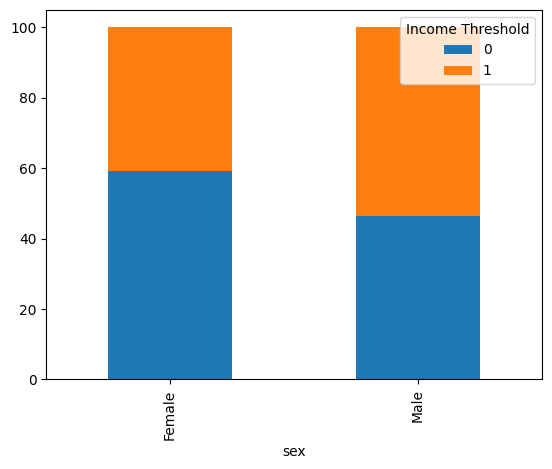

In [34]:
agent("Create a binary variable called 'Income Threhold' separating income<=50K (0) and income>50K (1). Draw a plot showing the percentage distribution of 'Income Threhold' variable by gender.Stack the column of the same gender.")

In [35]:
agent("What percentage of female has income <= 50k? How about male")



> Entering new AgentExecutor chain...
Thought: I need to calculate the percentage of female and male with income <= 50K
Action: python_repl_ast
Action Input: df[df['sex'] == 'Female']['income'].value_counts(normalize=True)
Observation: <=50K     0.592391
<=50K.    0.298357
>50K      0.072814
>50K.     0.036438
Name: income, dtype: float64
Thought: I need to calculate the percentage of male with income <= 50K
Action: python_repl_ast
Action Input: df[df['sex'] == 'Male']['income'].value_counts(normalize=True)
Observation: <=50K     0.463338
<=50K.    0.232894
>50K      0.204043
>50K.     0.099724
Name: income, dtype: float64
Thought: I now know the final answer
Final Answer: 59.2391% of female have income <= 50K, while 46.3338% of male have income <= 50K.

> Finished chain.


{'input': 'What percentage of female has income <= 50k? How about male',
 'output': '59.2391% of female have income <= 50K, while 46.3338% of male have income <= 50K.'}

## **2. Concurrent versus serial execution speed **

We assessed the speed of serial execution versus concurrent execution using the following 6 questions. You can add the same 6 questions to be questions 7-12.

Report the speed of serial and concurrent executions when you have 9 questions and 12 questions. Given the graph shown in class for 1-6 questions, comment on how the time for execution increases when we go to 9 questions and 12 questions.

In [36]:
%%capture
!pip install wikipedia
!pip install google-search-results

In [37]:
import asyncio
import time
from langchain.agents import initialize_agent, load_tools
from langchain.agents import AgentType
from langchain.llms import OpenAI

from langchain.utilities import SerpAPIWrapper

In [38]:
questions = [
    "When was the First Hundred Year War fought? Which countries were involved? ",
    "When was the First war of Indian independence fought? How many years later did India get independence? What was the time gap?",
    "When was the American Civil war fought? Who were involved in the war? ",
    "When was the Battle of Waterloo fought? Who were the leaders on either side? ",
    "When was the Han dynasty established? How long did it last?",
    "When was the Spanish Civil War fought? WHo were involved"
]


In [39]:
## Serial execution ##

# Initialize LangChain with OpenAI LLM and "wikipedia", "llm-math" tools
llm = OpenAI(temperature=0)
tools = load_tools(["wikipedia", "llm-math"], llm=llm)
agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)


# List to store elapsed times for each question
elapsed_times = []

# Run each question sequentially and time each execution
for q in questions:
    start_time = time.perf_counter()  # Start timer for the current question
    agent.run(q)                      # Run the agent with the current question
    end_time = time.perf_counter()    # End timer for the current question
    elapsed = end_time - start_time   # Calculate elapsed time for the current question
    elapsed_times.append(elapsed)     # Store the elapsed time

# Print the elapsed time for each question
for i, elapsed in enumerate(elapsed_times, 1):
    print(f"Question {i} executed in {elapsed:0.2f} seconds.")

# If you want to print the total elapsed time for all questions
print(f"Total executed in {sum(elapsed_times):0.2f} seconds.")



> Entering new AgentExecutor chain...
 I need to find out when and which countries were involved in the First Hundred Year War.
Action: Wikipedia
Action Input: First Hundred Year War
Observation: Page: Hundred Years' War
Summary: The Hundred Years' War (French: Guerre de Cent Ans; 1337–1453) was a series of armed conflicts fought between the kingdoms of England and France during the Late Middle Ages. It originated from English claims to the French throne. The war grew into a broader power struggle involving factions from across Western Europe, fueled by emerging nationalism on both sides. The periodization of the war takes place over 116 years, wherein the war was interrupted by several years of truces.
The Hundred Years' War was a significant conflict in the Middle Ages. During the war, five generations of kings from two rival dynasties fought for the throne of France, which was then the dominant kingdom in Western Europe. The war had a lasting effect on European history. Both sides

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Indian Rebellion of 1857
Summary: The Indian Rebellion of 1857 was a major uprising in India in 1857–58 against the rule of the British East India Company, which functioned as a sovereign power on behalf of the British Crown. The rebellion began on 10 May 1857 in the form of a mutiny of sepoys of the Company's army in the garrison town of Meerut, 40 mi (64 km) northeast of Delhi. It then erupted into other mutinies and civilian rebellions chiefly in the upper Gangetic plain and central India, though incidents of revolt also occurred farther north and east. The rebellion posed a military threat to British power in that region, and was contained only with the rebels' defeat in Gwalior on 20 June 1858. On 1 November 1858, the British granted amnesty to all rebels not involved in murder, though they did not declare the hostilities to have formally ended until 8 July 1859. 
The name of the revolt is contested, and it is variously described as the Sepoy Mutiny, the Indian

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Indian independence movement
Summary: The Indian independence movement was a series of historic events with the ultimate aim of ending British rule in India also known as British Raj. It lasted until 1947.
The first nationalistic revolutionary movement for Indian independence emerged from Bengal. It later took root in the newly formed Indian National Congress with prominent moderate leaders seeking the right to appear for Indian Civil Service examinations in British India, as well as more economic rights for natives. The first half of the 20th century saw a more radical approach towards self-rule.
The stages of the independence struggle in the 1920s were characterized by the leadership of Mahatma Gandhi and Congress' adoption of Gandhi's policy of non-violence and civil disobedience. Some of the leading followers of Gandhi's ideology were Jawaharlal Nehru, Subhas Chandra Bose, Vallabhbhai Patel, Abdul Ghaffar Khan, Maulana Azad, and others. Intellectuals such as Rab

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Battle of Waterloo
Summary: The Battle of Waterloo (Dutch pronunciation: [ˈʋaːtərloː] ) was fought on Sunday 18 June 1815, near Waterloo (at that time in the United Kingdom of the Netherlands, now in Belgium), marking  the end of the Napoleonic Wars. A French army under the command of Napoleon was defeated by two armies of the Seventh Coalition. One of these was a British-led force with units from the United Kingdom, the Netherlands, Hanover, Brunswick, and Nassau, under the command of the Duke of Wellington (often referred to as the Anglo-allied army or Wellington's army). The other comprised three corps of the Prussian army under Field Marshal von Blücher (the fourth corps of this army fought at the Battle of Wavre on the same day). The battle was known contemporarily as the Battle of Mont Saint-Jean in France or La Belle Alliance ("the Beautiful Alliance") in Prussia.Upon Napoleon's return to power in March 1815 (beginning the Hundred Days), many states that had 

In [41]:
questions = [
    "When was the First Hundred Year War fought? Which countries were involved? ",
    "When was the First war of Indian independence fought? How many years later did India get independence? What was the time gap?",
    "When was the American Civil war fought? Who were involved in the war? ",
    "When was the Battle of Waterloo fought? Who were the leaders on either side? ",
    "When was the Han dynasty established? How long did it last?",
    "When was the Spanish Civil War fought? WHo were involved",
    "When was the Spanish Civil War fought? WHo were involved",
    "When was the Han dynasty established? How long did it last?",
    "When was the Battle of Waterloo fought? Who were the leaders on either side? ",
    "When was the American Civil war fought? Who were involved in the war? ",
    "When was the First war of Indian independence fought? How many years later did India get independence? What was the time gap?",
    "When was the First Hundred Year War fought? Which countries were involved? ",
]

In [42]:
## Serial execution ##

# Initialize LangChain with OpenAI LLM and "wikipedia", "llm-math" tools
llm = OpenAI(temperature=0)
tools = load_tools(["wikipedia", "llm-math"], llm=llm)
agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)


# List to store elapsed times for each question
elapsed_times = []

# Run each question sequentially and time each execution
for q in questions:
    start_time = time.perf_counter()  # Start timer for the current question
    agent.run(q)                      # Run the agent with the current question
    end_time = time.perf_counter()    # End timer for the current question
    elapsed = end_time - start_time   # Calculate elapsed time for the current question
    elapsed_times.append(elapsed)     # Store the elapsed time

# Create a DataFrame from the elapsed times
df_times = pd.DataFrame({
    'Question Number': range(1, len(questions) + 1),
    'Elapsed Time (s)': elapsed_times
})

# Print out the DataFrame in HTML format
from IPython.display import display, HTML
display(HTML(df_times.to_html(index=False)))




> Entering new AgentExecutor chain...
 I need to find out when and which countries were involved in the First Hundred Year War.
Action: Wikipedia
Action Input: First Hundred Year War
Observation: Page: Hundred Years' War
Summary: The Hundred Years' War (French: Guerre de Cent Ans; 1337–1453) was a series of armed conflicts fought between the kingdoms of England and France during the Late Middle Ages. It originated from English claims to the French throne. The war grew into a broader power struggle involving factions from across Western Europe, fueled by emerging nationalism on both sides. The periodization of the war takes place over 116 years, wherein the war was interrupted by several years of truces.
The Hundred Years' War was a significant conflict in the Middle Ages. During the war, five generations of kings from two rival dynasties fought for the throne of France, which was then the dominant kingdom in Western Europe. The war had a lasting effect on European history. Both sides

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Indian Rebellion of 1857
Summary: The Indian Rebellion of 1857 was a major uprising in India in 1857–58 against the rule of the British East India Company, which functioned as a sovereign power on behalf of the British Crown. The rebellion began on 10 May 1857 in the form of a mutiny of sepoys of the Company's army in the garrison town of Meerut, 40 mi (64 km) northeast of Delhi. It then erupted into other mutinies and civilian rebellions chiefly in the upper Gangetic plain and central India, though incidents of revolt also occurred farther north and east. The rebellion posed a military threat to British power in that region, and was contained only with the rebels' defeat in Gwalior on 20 June 1858. On 1 November 1858, the British granted amnesty to all rebels not involved in murder, though they did not declare the hostilities to have formally ended until 8 July 1859. 
The name of the revolt is contested, and it is variously described as the Sepoy Mutiny, the Indian

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Indian independence movement
Summary: The Indian independence movement was a series of historic events with the ultimate aim of ending British rule in India also known as British Raj. It lasted until 1947.
The first nationalistic revolutionary movement for Indian independence emerged from Bengal. It later took root in the newly formed Indian National Congress with prominent moderate leaders seeking the right to appear for Indian Civil Service examinations in British India, as well as more economic rights for natives. The first half of the 20th century saw a more radical approach towards self-rule.
The stages of the independence struggle in the 1920s were characterized by the leadership of Mahatma Gandhi and Congress' adoption of Gandhi's policy of non-violence and civil disobedience. Some of the leading followers of Gandhi's ideology were Jawaharlal Nehru, Subhas Chandra Bose, Vallabhbhai Patel, Abdul Ghaffar Khan, Maulana Azad, and others. Intellectuals such as Rab

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Battle of Waterloo
Summary: The Battle of Waterloo (Dutch pronunciation: [ˈʋaːtərloː] ) was fought on Sunday 18 June 1815, near Waterloo (at that time in the United Kingdom of the Netherlands, now in Belgium), marking  the end of the Napoleonic Wars. A French army under the command of Napoleon was defeated by two armies of the Seventh Coalition. One of these was a British-led force with units from the United Kingdom, the Netherlands, Hanover, Brunswick, and Nassau, under the command of the Duke of Wellington (often referred to as the Anglo-allied army or Wellington's army). The other comprised three corps of the Prussian army under Field Marshal von Blücher (the fourth corps of this army fought at the Battle of Wavre on the same day). The battle was known contemporarily as the Battle of Mont Saint-Jean in France or La Belle Alliance ("the Beautiful Alliance") in Prussia.Upon Napoleon's return to power in March 1815 (beginning the Hundred Days), many states that had 

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Battle of Waterloo
Summary: The Battle of Waterloo (Dutch pronunciation: [ˈʋaːtərloː] ) was fought on Sunday 18 June 1815, near Waterloo (at that time in the United Kingdom of the Netherlands, now in Belgium), marking  the end of the Napoleonic Wars. A French army under the command of Napoleon was defeated by two armies of the Seventh Coalition. One of these was a British-led force with units from the United Kingdom, the Netherlands, Hanover, Brunswick, and Nassau, under the command of the Duke of Wellington (often referred to as the Anglo-allied army or Wellington's army). The other comprised three corps of the Prussian army under Field Marshal von Blücher (the fourth corps of this army fought at the Battle of Wavre on the same day). The battle was known contemporarily as the Battle of Mont Saint-Jean in France or La Belle Alliance ("the Beautiful Alliance") in Prussia.Upon Napoleon's return to power in March 1815 (beginning the Hundred Days), many states that had 

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Indian Rebellion of 1857
Summary: The Indian Rebellion of 1857 was a major uprising in India in 1857–58 against the rule of the British East India Company, which functioned as a sovereign power on behalf of the British Crown. The rebellion began on 10 May 1857 in the form of a mutiny of sepoys of the Company's army in the garrison town of Meerut, 40 mi (64 km) northeast of Delhi. It then erupted into other mutinies and civilian rebellions chiefly in the upper Gangetic plain and central India, though incidents of revolt also occurred farther north and east. The rebellion posed a military threat to British power in that region, and was contained only with the rebels' defeat in Gwalior on 20 June 1858. On 1 November 1858, the British granted amnesty to all rebels not involved in murder, though they did not declare the hostilities to have formally ended until 8 July 1859. 
The name of the revolt is contested, and it is variously described as the Sepoy Mutiny, the Indian

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Indian independence movement
Summary: The Indian independence movement was a series of historic events with the ultimate aim of ending British rule in India also known as British Raj. It lasted until 1947.
The first nationalistic revolutionary movement for Indian independence emerged from Bengal. It later took root in the newly formed Indian National Congress with prominent moderate leaders seeking the right to appear for Indian Civil Service examinations in British India, as well as more economic rights for natives. The first half of the 20th century saw a more radical approach towards self-rule.
The stages of the independence struggle in the 1920s were characterized by the leadership of Mahatma Gandhi and Congress' adoption of Gandhi's policy of non-violence and civil disobedience. Some of the leading followers of Gandhi's ideology were Jawaharlal Nehru, Subhas Chandra Bose, Vallabhbhai Patel, Abdul Ghaffar Khan, Maulana Azad, and others. Intellectuals such as Rab

Question Number,Elapsed Time (s)
1,6.672320
2,7.625794
3,4.753890
4,6.779076
5,3.013705
6,5.122692
7,4.611485
8,2.607817
9,5.321477
10,4.091547




> Entering new AgentExecutor chain...
Thought: I need to calculate the average elapsed time
Action: python_repl_ast
Action Input: df['Elapsed Time (s)'].mean()
Observation: 4.8313981699166675
Thought: I now know the final answer
Final Answer: The average elapsed time per question is 4.83 seconds.

> Finished chain.


> Entering new AgentExecutor chain...
Thought: I need to plot a graph using the data from the dataframe.
Action: python_repl_ast
Action Input: df.plot(x='Question Number', y='Elapsed Time (s)', kind='bar')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: The graph should show the elapsed time for each question in time order.

> Finished chain.


{'input': 'plot a column graph showing the elapsed time for each question following the time order.',
 'output': 'The graph should show the elapsed time for each question in time order.'}

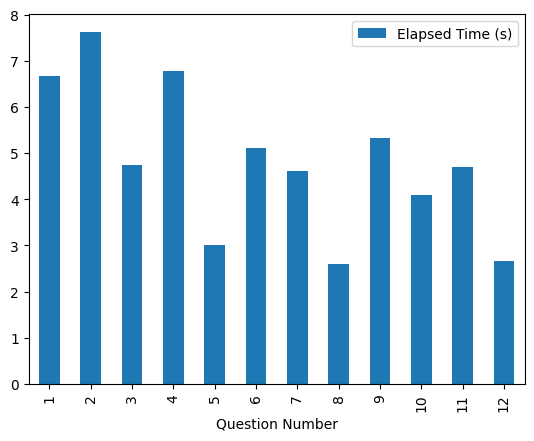

In [47]:
# Create an instance of the OpenAI language model.
llm = OpenAI(temperature=0.5)
data=df_times

# Create a pandas_dataframe agent
agent = create_pandas_dataframe_agent(
    llm,              #language model instance
    data,             #data frame used
    verbose=True,
)

agent("what is the average elapsed time per question?")
agent("plot a column graph showing the elapsed time for each question following the time order.")

In [46]:
## Concurrent execution ##

# Initialize LangChain with OpenAI LLM and "wikipedia", "llm-math" tools
llm = OpenAI(temperature=0)
tools = load_tools(["wikipedia", "llm-math"], llm=llm)
agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

# Start timer
s = time.perf_counter()

# Run all questions concurrently using asyncio and gather results
tasks = [agent.arun(q) for q in questions[:6]]
await asyncio.gather(*tasks)
# Stop timer and calculate elapsed time
elapsed_concurrent_6Q = time.perf_counter() - s

# Run all questions concurrently using asyncio and gather results
tasks = [agent.arun(q) for q in questions[:9]]
await asyncio.gather(*tasks)
# Stop timer and calculate elapsed time
elapsed_concurrent_9Q = time.perf_counter() - s

# Run all questions concurrently using asyncio and gather results
tasks = [agent.arun(q) for q in questions[:12]]
await asyncio.gather(*tasks)
# Stop timer and calculate elapsed time
elapsed_concurrent_12Q = time.perf_counter() - s


df_times_concurrent = pd.DataFrame({
    'No.Questions': [6,9,12],
    'Elapsed Time (s)': [elapsed_concurrent_6Q, elapsed_concurrent_9Q, elapsed_concurrent_12Q],
    'Avg. Elapsed Time per Q' : [elapsed_concurrent_6Q/6, elapsed_concurrent_9Q/9, elapsed_concurrent_12Q/12]
})

display(HTML(df_times_concurrent.to_html(index=False)))




> Entering new AgentExecutor chain...


> Entering new AgentExecutor chain...


> Entering new AgentExecutor chain...


> Entering new AgentExecutor chain...


> Entering new AgentExecutor chain...


> Entering new AgentExecutor chain...
 I need to find out when the war was fought and who was involved.
Action: Wikipedia
Action Input: American Civil War I need to find out when the battle was fought and who the leaders were.
Action: Wikipedia
Action Input: Battle of Waterloo I need to find out when the war was fought and when India got independence
Action: Wikipedia
Action Input: First war of Indian independence I need to find out when the war was fought and who was involved
Action: Wikipedia
Action Input: Spanish Civil War I need to find out when and which countries were involved in the First Hundred Year War.
Action: Wikipedia
Action Input: First Hundred Year War I need to find out when the Han dynasty was established and how long it lasted.
Action: Wikipedia
Action Input: Han dynast

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: American Civil War
Summary: The American Civil War (April 12, 1861 – May 26, 1865; also known by other names) was a civil war in the United States between the Union ("the North") and the Confederacy ("the South"), which had been formed by states that had seceded from the Union. The cause of the war was the dispute over whether slavery would be permitted to expand into the western territories, leading to more slave states, or be prevented from doing so, which many believed would place slavery on a course of ultimate extinction.
Decades of political controversy over slavery were brought to a head by the victory in the 1860 U.S. presidential election of Abraham Lincoln, who opposed slavery's expansion into the western territories. Seven southern slave states responded to Lincoln's victory by seceding from the United States and forming the Confederacy. The Confederacy seized U.S. forts and other federal assets within their borders. Four more southern states seceded afte

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


 I now know when the Han dynasty was established and how long it lasted.
Final Answer: The Han dynasty was established in 202 BC and lasted until 220 AD, spanning over four centuries.

> Finished chain.
 I need to find out when India got independence
Action: Wikipedia
Action Input: Indian independence I now know the final answer
Final Answer: The First Hundred Year War was fought from 1337 to 1453 between the kingdoms of England and France.

> Finished chain.
 I need to find out who the leaders were.
Action: Wikipedia
Action Input: Order of battle of Waterloo I now know the general information about the American Civil War.
Final Answer: The American Civil War was fought from April 12, 1861 to May 26, 1865 between the Union ("the North") and the Confederacy ("the South"), which had been formed by states that had seceded from the Union. The cause of the war was the dispute over whether slavery would be permitted to expand into the western territories. The war left between 620,000 and 750

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Order of battle of the Waterloo campaign
Summary: This is the complete order of battle for the four major battles of the Waterloo campaign.

Page: Battle of Waterloo
Summary: The Battle of Waterloo (Dutch pronunciation: [ˈʋaːtərloː] ) was fought on Sunday 18 June 1815, near Waterloo (at that time in the United Kingdom of the Netherlands, now in Belgium), marking  the end of the Napoleonic Wars. A French army under the command of Napoleon was defeated by two armies of the Seventh Coalition. One of these was a British-led force with units from the United Kingdom, the Netherlands, Hanover, Brunswick, and Nassau, under the command of the Duke of Wellington (often referred to as the Anglo-allied army or Wellington's army). The other comprised three corps of the Prussian army under Field Marshal von Blücher (the fourth corps of this army fought at the Battle of Wavre on the same day). The battle was known contemporarily as the Battle of Mont Saint-Jean in France or La Bel

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Spanish Civil War
Summary: The Spanish Civil War (Spanish: Guerra Civil Española) was fought from 1936 to 1939 between the Republicans and the Nationalists. Republicans were loyal to the left-leaning Popular Front government of the Second Spanish Republic, and consisted of various socialist, communist, separatist, anarchist, and republican parties, some of which had opposed the government in the pre-war period. The opposing Nationalists were an alliance of Falangists, monarchists, conservatives, and traditionalists led by a military junta among whom General Francisco Franco quickly achieved a preponderant role. Due to the international political climate at the time, the war had many facets and was variously viewed as class struggle, a religious struggle, a struggle between dictatorship and republican democracy, between revolution and counterrevolution, and between fascism and communism. According to Claude Bowers, U.S. ambassador to Spain during the war, it was the 

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Indian Rebellion of 1857
Summary: The Indian Rebellion of 1857 was a major uprising in India in 1857–58 against the rule of the British East India Company, which functioned as a sovereign power on behalf of the British Crown. The rebellion began on 10 May 1857 in the form of a mutiny of sepoys of the Company's army in the garrison town of Meerut, 40 mi (64 km) northeast of Delhi. It then erupted into other mutinies and civilian rebellions chiefly in the upper Gangetic plain and central India, though incidents of revolt also occurred farther north and east. The rebellion posed a military threat to British power in that region, and was contained only with the rebels' defeat in Gwalior on 20 June 1858. On 1 November 1858, the British granted amnesty to all rebels not involved in murder, though they did not declare the hostilities to have formally ended until 8 July 1859. 
The name of the revolt is contested, and it is variously described as the Sepoy Mutiny, the Indian

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


 I now know the general information about the American Civil War.
Final Answer: The American Civil War was fought from April 12, 1861 to May 26, 1865 between the Union ("the North") and the Confederacy ("the South"), which had been formed by states that had seceded from the Union. The cause of the war was the dispute over whether slavery would be permitted to expand into the western territories. The war left between 620,000 and 750,000 soldiers dead.
 I now know the general timeline of the Spanish Civil War and who was involved
Final Answer: The Spanish Civil War was fought from 1936 to 1939 between the Republicans and the Nationalists. Republicans were loyal to the left-leaning Popular Front government of the Second Spanish Republic, and consisted of various socialist, communist, separatist, anarchist, and republican parties, while the Nationalists were an alliance of Falangists, monarchists, conservatives, and traditionalists led by a military junta among whom General Francisco Franc

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


 I now know when the Han dynasty was established and how long it lasted.
Final Answer: The Han dynasty was established in 202 BC and lasted until 220 AD, spanning over four centuries.

> Finished chain.
 I now know the final answer
Final Answer: The First Hundred Year War was fought from 1337 to 1453 between the kingdoms of England and France.

> Finished chain.

Observation: Page: Indian independence movement
Summary: The Indian independence movement was a series of historic events with the ultimate aim of ending British rule in India also known as British Raj. It lasted until 1947.
The first nationalistic revolutionary movement for Indian independence emerged from Bengal. It later took root in the newly formed Indian National Congress with prominent moderate leaders seeking the right to appear for Indian Civil Service examinations in British India, as well as more economic rights for natives. The first half of the 20th century saw a more radical approach towards self-rule.
The stages

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Spanish Civil War
Summary: The Spanish Civil War (Spanish: Guerra Civil Española) was fought from 1936 to 1939 between the Republicans and the Nationalists. Republicans were loyal to the left-leaning Popular Front government of the Second Spanish Republic, and consisted of various socialist, communist, separatist, anarchist, and republican parties, some of which had opposed the government in the pre-war period. The opposing Nationalists were an alliance of Falangists, monarchists, conservatives, and traditionalists led by a military junta among whom General Francisco Franco quickly achieved a preponderant role. Due to the international political climate at the time, the war had many facets and was variously viewed as class struggle, a religious struggle, a struggle between dictatorship and republican democracy, between revolution and counterrevolution, and between fascism and communism. According to Claude Bowers, U.S. ambassador to Spain during the war, it was the 

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Han dynasty
Summary: The Han dynasty (UK: , US: ; traditional Chinese: 漢朝; simplified Chinese: 汉朝; pinyin: Hàncháo) was an imperial dynasty of China (202 BC – 9 AD, 25–220 AD), established by Liu Bang and ruled by the House of Liu. The dynasty was preceded by the short-lived Qin dynasty (221–207 BC) and a warring interregnum known as the Chu–Han contention (206–202 BC), and it was succeeded by the Three Kingdoms period (220–280 AD). The dynasty was briefly interrupted by the Xin dynasty (9–23 AD) established by usurping regent Wang Mang, and is thus separated into two periods—the Western Han (202 BC – 9 AD) and the Eastern Han (25–220 AD). Spanning over four centuries, the Han dynasty is considered a golden age in Chinese history, and it has influenced the identity of the Chinese civilization ever since. Modern China's majority ethnic group refer to themselves as the "Han people" or "Han Chinese". The spoken Sinitic language and written Chinese are referred to respe

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Battle of Waterloo
Summary: The Battle of Waterloo (Dutch pronunciation: [ˈʋaːtərloː] ) was fought on Sunday 18 June 1815, near Waterloo (at that time in the United Kingdom of the Netherlands, now in Belgium), marking  the end of the Napoleonic Wars. A French army under the command of Napoleon was defeated by two armies of the Seventh Coalition. One of these was a British-led force with units from the United Kingdom, the Netherlands, Hanover, Brunswick, and Nassau, under the command of the Duke of Wellington (often referred to as the Anglo-allied army or Wellington's army). The other comprised three corps of the Prussian army under Field Marshal von Blücher (the fourth corps of this army fought at the Battle of Wavre on the same day). The battle was known contemporarily as the Battle of Mont Saint-Jean in France or La Belle Alliance ("the Beautiful Alliance") in Prussia.Upon Napoleon's return to power in March 1815 (beginning the Hundred Days), many states that had 

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


 I now know the general information about the American Civil War.
Final Answer: The American Civil War was fought from April 12, 1861 to May 26, 1865 between the Union ("the North") and the Confederacy ("the South"), which had been formed by states that had seceded from the Union. The cause of the war was the dispute over whether slavery would be permitted to expand into the western territories. The war left between 620,000 and 750,000 soldiers dead.

> Finished chain.

Observation: Page: Indian independence movement
Summary: The Indian independence movement was a series of historic events with the ultimate aim of ending British rule in India also known as British Raj. It lasted until 1947.
The first nationalistic revolutionary movement for Indian independence emerged from Bengal. It later took root in the newly formed Indian National Congress with prominent moderate leaders seeking the right to appear for Indian Civil Service examinations in British India, as well as more economic rig

No.Questions,Elapsed Time (s),Avg. Elapsed Time per Q
6,12.127109,2.021185
9,26.992893,2.999210
12,43.230564,3.602547


## **The observations:**

(1) Question with similar token size has similar elapsed time. But the elapsed time for processing the same question the second time is consistently shorter than the first time.

(2) Concurrent processing takes less avg. time per question (2-3.6s) than serial processing (4.8s).

(3) However, as the number of questions increases, the avg. processing time for concurrent processing also increases.


# **3. Use of pydantic for formatting output**

Here is a review of a restaurant:

“My husband and I came here for a quick dinner last night, before visiting The Hideaway club down the road. From the moment we walked in, we were greeted with a warm and friendly service. The decor is quirky and inviting and we immediately felt comfortable. I love that the menu is quite small and uncomplicated. We chose several starter dishes and two main dishes, which was plenty to fill us up - This is not your “run of the mill” Chinese food. Everything is cooked fresh and you can taste the difference in comparison to some other restaurants.”

1. As you did in HW1, write a prompt to extract the following from the review above:

a. Overall sentiment: 1-5 (integer)

b. Food: Positive or Negative (Boolean, i.e., binary)

c. Service: Positive or Negative (Boolean, i.e., binary)

In [48]:
review = """\

My husband and I came here for a quick dinner last night, \
before visiting The Hideaway club down the road. \
From the moment we walked in, we were greeted with a warm and friendly service. \
The decor is quirky and inviting and we immediately felt comfortable. \
I love that the menu is quite small and uncomplicated. \
We chose several starter dishes and two main dishes, \
which was plenty to fill us up - \
This is not your “run of the mill” Chinese food. \
Everything is cooked fresh and you can taste the \
difference in comparison to some other restaurants.

"""

In [60]:
from langchain.chat_models import ChatOpenAI
from langchain import PromptTemplate
from langchain import LLMChain

# Defining task of analyzing reviews for GPT
template = """

For this

```{review}''',

extract the following information:

Overall sentiment: 1-5 (integer)

Food: Positive or Negative (Boolean, i.e., binary)

Service: Positive or Negative (Boolean, i.e., binary)

"""

prompt_template = PromptTemplate(
  template=template,
  input_variables=["review"],
)

llm = ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo")

chain = LLMChain(llm=llm, prompt=prompt_template)
response=chain.run(review=review)

print(response)

Overall sentiment: 5

Food: Positive

Service: Positive


2. Use pydantic to ensure the types and also the conditions (1-5, Boolean etc.). Show output

3. Parse the JSON output from pydantic and check the three types.

In [66]:
#Using pydantic for parsiing
from langchain.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field, validator        #Pydantic objects


# Define your desired output data structure.
class ReviewScore(BaseModel):
    overall_sentiment: int = Field(description="sentiment of review", ge=0, le=5)
    food: bool = Field(description="This is a binary variable describing the customer's opinion about the food, 0: do not recommend 1: recommend")
    service: bool = Field(description="This is a binary variable describing the customer's opinion about the service, 0: do not recommend 1: recommend")

# Set up a parser + inject instructions into the prompt template.
pydantic_parser = PydanticOutputParser(pydantic_object=ReviewScore)
format_instructions = pydantic_parser.get_format_instructions()
print(format_instructions)

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"overall_sentiment": {"title": "Overall Sentiment", "description": "sentiment of review", "minimum": 0, "maximum": 5, "type": "integer"}, "food": {"title": "Food", "description": "This is a binary variable describing the customer's opinion about the food, 0: do not recommend 1: recommend", "type": "boolean"}, "service": {"title": "Service", "description": "This is a binary variable describing the customer's opinion about the service, 0: do not recommend 1: recommend", "type": "boolean"}}, "required": ["overall_sentiment", "food

In [67]:
# Defining task of analyzing reviews for GPT
template = """

For this

```{review}''',

extract the following information:

Overall sentiment: 1-5 (integer)

Food: Positive or Negative (Boolean, i.e., binary)

Service: Positive or Negative (Boolean, i.e., binary)

{format_instructions}
"""

prompt_template = PromptTemplate(
  template=template,
  input_variables=["review"],
)

llm = ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo")

chain = LLMChain(llm=llm, prompt=prompt_template)
response=chain.run(review=review, format_instructions=format_instructions)

print(response)

{"overall_sentiment": 5, "food": true, "service": true}


In [68]:
review = pydantic_parser.parse(response)

review

ReviewScore(overall_sentiment=5, food=True, service=True)